In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/04_Apr.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,25.000000,61.000000,1,7,0,2361.0,2250.0,2309.0,2382.0,2337.0,2266.0,2368.583333,2475.0
1,24.916667,61.583333,1,7,0,2394.0,2251.0,2273.0,2298.0,2242.0,2203.0,2380.666667,2418.0
2,24.833333,62.166667,1,7,0,2640.0,2355.0,2247.0,2239.0,2040.0,2055.0,2379.083333,2228.0
3,24.750000,62.750000,1,7,0,2560.0,2347.0,2270.0,2254.0,2093.0,2039.0,2373.833333,2207.0
4,24.666667,63.333333,2,7,0,2475.0,2361.0,2250.0,2209.0,2076.0,2025.0,2367.583333,2175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,27.982450,33.440678,23,4,1,2893.0,2902.0,2927.0,2931.0,3129.0,2893.0,2902.750000,2907.0
8732,27.982450,33.440678,24,4,1,2893.0,2906.0,2900.0,2896.0,3118.0,2715.0,2904.416667,2920.0
8733,27.982450,33.440678,24,4,1,2918.0,2895.0,2913.0,2868.0,3081.0,2765.0,2904.916667,2919.0
8734,27.312450,33.440678,24,4,1,2917.0,2877.0,2912.0,2898.0,3041.0,2768.0,2898.250000,2832.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8736 non-null   float64
 1   Hum     8736 non-null   float64
 2   A       8736 non-null   int64  
 3   B       8736 non-null   int64  
 4   C       8736 non-null   int64  
 5   D       8736 non-null   float64
 6   E       8736 non-null   float64
 7   F       8736 non-null   float64
 8   G       8736 non-null   float64
 9   H       8736 non-null   float64
 10  I       8736 non-null   float64
 11  J       8736 non-null   float64
 12  Cons    8736 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 887.4 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8736 non-null   float64
 1   Hum     8736 non-null   float64
 2   A       8736 non-null   float64
 3   B       8736 non-null   float64
 4   C       8736 non-null   float64
 5   D       8736 non-null   float64
 6   E       8736 non-null   float64
 7   F       8736 non-null   float64
 8   G       8736 non-null   float64
 9   H       8736 non-null   float64
 10  I       8736 non-null   float64
 11  J       8736 non-null   float64
 12  Cons    8736 non-null   float64
dtypes: float64(13)
memory usage: 887.4 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 4800][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.158209,-0.740413,1.238689,-1.660674,1.511373,-1.457264,-0.237839,-0.623175,-0.418753,-0.162010,-0.272920,-0.486151,-0.224629
1,-0.039674,-0.756691,1.277026,-1.660674,1.511373,-1.457264,-0.123269,-0.619703,-0.543769,-0.453566,-0.614835,-0.720941,-0.180076
2,-0.699287,-0.772969,1.315363,-1.660674,1.511373,-1.457264,0.730797,-0.258623,-0.634059,-0.658350,-1.341853,-1.272511,-0.185914
3,-0.772191,-0.789246,1.353699,-1.660674,1.511373,-1.457264,0.453052,-0.286398,-0.554187,-0.606286,-1.151101,-1.332140,-0.205271
4,-0.883284,-0.805524,1.392036,-1.516238,1.511373,-1.457264,0.157948,-0.237791,-0.623641,-0.762477,-1.212285,-1.384316,-0.228316


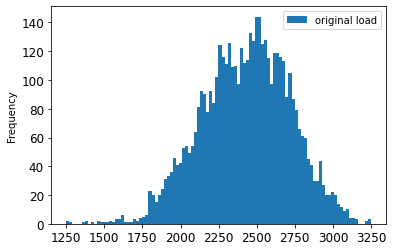

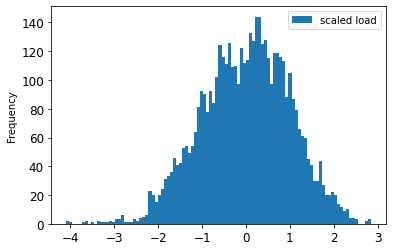

In [9]:
stlf_data[stlf_data.index <= 4800][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4800][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

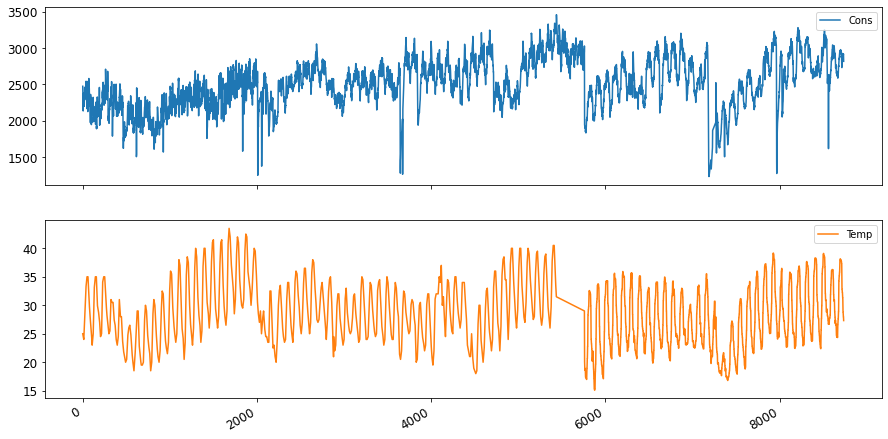

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,0.158209,-0.740413,1.238689,-1.660674,1.511373,-1.457264,-0.237839,-0.623175,-0.418753,-0.162010,-0.272920,-0.486151,-0.224629,-0.039674
1,-0.039674,-0.756691,1.277026,-1.660674,1.511373,-1.457264,-0.123269,-0.619703,-0.543769,-0.453566,-0.614835,-0.720941,-0.180076,-0.699287
2,-0.699287,-0.772969,1.315363,-1.660674,1.511373,-1.457264,0.730797,-0.258623,-0.634059,-0.658350,-1.341853,-1.272511,-0.185914,-0.772191
3,-0.772191,-0.789246,1.353699,-1.660674,1.511373,-1.457264,0.453052,-0.286398,-0.554187,-0.606286,-1.151101,-1.332140,-0.205271,-0.883284
4,-0.883284,-0.805524,1.392036,-1.516238,1.511373,-1.457264,0.157948,-0.237791,-0.623641,-0.762477,-1.212285,-1.384316,-0.228316,-1.018678
5,-1.018678,-0.821802,1.430373,-1.516238,1.511373,-1.457264,-0.039945,-0.123218,-0.620168,-0.800657,-1.233880,-1.522208,-0.263651,-0.702758
6,-0.702758,-0.838080,1.468709,-1.516238,1.511373,-1.457264,-0.699590,0.730876,-0.259009,-0.745123,-1.053925,-1.250150,-0.302981,-0.685400
7,-0.685400,-0.854357,1.507046,-1.516238,1.511373,-1.457264,-0.772498,0.453122,-0.286791,-0.866604,-0.963947,-1.347048,-0.338316,-0.827738
8,-0.827738,-0.870635,1.545383,-1.371801,1.511373,-1.457264,-0.883596,0.158008,-0.238173,-0.946435,-1.118709,-1.507301,-0.390551,-0.723588
9,-0.723588,-0.886913,1.583719,-1.371801,1.511373,-1.457264,-1.018997,-0.039892,-0.123575,-0.561165,-1.169096,-1.276238,-0.443707,-0.178540


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,0.158209,-0.740413,1.238689,-1.660674,1.511373,-1.457264,-0.237839,-0.623175,-0.418753,-0.162010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158209
1,-0.039674,-0.756691,1.277026,-1.660674,1.511373,-1.457264,-0.123269,-0.619703,-0.543769,-0.453566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158209,-0.039674
2,-0.699287,-0.772969,1.315363,-1.660674,1.511373,-1.457264,0.730797,-0.258623,-0.634059,-0.658350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158209,-0.039674,-0.699287
3,-0.772191,-0.789246,1.353699,-1.660674,1.511373,-1.457264,0.453052,-0.286398,-0.554187,-0.606286,...,NaN,NaN,NaN,NaN,NaN,NaN,0.158209,-0.039674,-0.699287,-0.772191
4,-0.883284,-0.805524,1.392036,-1.516238,1.511373,-1.457264,0.157948,-0.237791,-0.623641,-0.762477,...,NaN,NaN,NaN,NaN,NaN,0.158209,-0.039674,-0.699287,-0.772191,-0.883284
5,-1.018678,-0.821802,1.430373,-1.516238,1.511373,-1.457264,-0.039945,-0.123218,-0.620168,-0.800657,...,NaN,NaN,NaN,NaN,0.158209,-0.039674,-0.699287,-0.772191,-0.883284,-1.018678
6,-0.702758,-0.838080,1.468709,-1.516238,1.511373,-1.457264,-0.699590,0.730876,-0.259009,-0.745123,...,NaN,NaN,NaN,0.158209,-0.039674,-0.699287,-0.772191,-0.883284,-1.018678,-0.702758
7,-0.685400,-0.854357,1.507046,-1.516238,1.511373,-1.457264,-0.772498,0.453122,-0.286791,-0.866604,...,NaN,NaN,0.158209,-0.039674,-0.699287,-0.772191,-0.883284,-1.018678,-0.702758,-0.685400
8,-0.827738,-0.870635,1.545383,-1.371801,1.511373,-1.457264,-0.883596,0.158008,-0.238173,-0.946435,...,NaN,0.158209,-0.039674,-0.699287,-0.772191,-0.883284,-1.018678,-0.702758,-0.685400,-0.827738
9,-0.723588,-0.886913,1.583719,-1.371801,1.511373,-1.457264,-1.018997,-0.039892,-0.123575,-0.561165,...,0.158209,-0.039674,-0.699287,-0.772191,-0.883284,-1.018678,-0.702758,-0.685400,-0.827738,-0.723588


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-0.178540,-0.903191,1.622056,-1.371801,1.511373,-1.457264,-0.703062,-0.699557,0.730706,-0.384148,...,-0.039674,-0.699287,-0.772191,-0.883284,-1.018678,-0.702758,-0.685400,-0.827738,-0.723588,-0.178540
11,-0.230615,-0.919468,1.660393,-1.371801,1.511373,-1.457264,-0.685703,-0.772468,0.452891,-0.422328,...,-0.699287,-0.772191,-0.883284,-1.018678,-0.702758,-0.685400,-0.827738,-0.723588,-0.178540,-0.230615
12,-0.275746,-0.935746,1.698730,-1.227365,1.511373,-1.457264,-0.828047,-0.883570,0.157713,-0.366794,...,-0.772191,-0.883284,-1.018678,-0.702758,-0.685400,-0.827738,-0.723588,-0.178540,-0.230615,-0.275746
13,-0.369481,-0.870635,1.605626,-1.227365,1.511373,-1.457264,-0.723893,-1.018975,-0.040230,-0.512572,...,-0.883284,-1.018678,-0.702758,-0.685400,-0.827738,-0.723588,-0.178540,-0.230615,-0.275746,-0.369481
14,-0.577779,-0.805524,1.512523,-1.227365,1.511373,-1.457264,-0.178818,-0.703029,-0.700040,-0.599344,...,-1.018678,-0.702758,-0.685400,-0.827738,-0.723588,-0.178540,-0.230615,-0.275746,-0.369481,-0.577779


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4790 entries, 10 to 4799
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  4790 non-null   float64
 1   Temp           4790 non-null   float64
 2   Hum            4790 non-null   float64
 3   A              4790 non-null   float64
 4   B              4790 non-null   float64
 5   C              4790 non-null   float64
 6   D              4790 non-null   float64
 7   E              4790 non-null   float64
 8   F              4790 non-null   float64
 9   G              4790 non-null   float64
 10  H              4790 non-null   float64
 11  I              4790 non-null   float64
 12  J              4790 non-null   float64
 13  y_t+1          4790 non-null   float64
 14  Cons_t-10      4790 non-null   float64
 15  Cons_t-9       4790 non-null   float64
 16  Cons_t-8       4790 non-null   float64
 17  Cons_t-7       4790 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
10,-0.230615
11,-0.275746
12,-0.369481
13,-0.577779
14,-0.633325
...,...
4795,-0.546534
4796,-0.522233
4797,-0.251445
4798,-0.303519


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-0.178540,-0.178540,-0.723588,-0.827738,-0.685400,-0.702758,-1.018678,-0.883284,-0.772191,-0.699287,...,-1.371801,1.511373,-1.457264,-0.703062,-0.699557,0.730706,-0.384148,-0.564447,-0.728395,-0.524210
11,-0.230615,-0.230615,-0.178540,-0.723588,-0.827738,-0.685400,-0.702758,-1.018678,-0.883284,-0.772191,...,-1.371801,1.511373,-1.457264,-0.685703,-0.772468,0.452891,-0.422328,-0.524857,-0.791751,-0.584741
12,-0.275746,-0.275746,-0.230615,-0.178540,-0.723588,-0.827738,-0.685400,-0.702758,-1.018678,-0.883284,...,-1.227365,1.511373,-1.457264,-0.828047,-0.883570,0.157713,-0.366794,-0.571646,-0.840199,-0.623149
13,-0.369481,-0.369481,-0.275746,-0.230615,-0.178540,-0.723588,-0.827738,-0.685400,-0.702758,-1.018678,...,-1.227365,1.511373,-1.457264,-0.723893,-1.018975,-0.040230,-0.512572,-0.694015,-0.955731,-0.652339
14,-0.577779,-0.577779,-0.369481,-0.275746,-0.230615,-0.178540,-0.723588,-0.827738,-0.685400,-0.702758,...,-1.227365,1.511373,-1.457264,-0.178818,-0.703029,-0.700040,-0.599344,-0.855974,-1.011633,-0.641585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,-0.466687,-0.466687,-0.428499,-0.629854,-0.987433,-0.994376,-0.831209,-0.796493,-0.688872,-0.574308,...,1.516930,1.017357,0.686218,-0.994694,-0.574568,-0.095793,2.031603,1.803760,1.753670,-0.658791
4796,-0.546534,-0.546534,-0.466687,-0.428499,-0.629854,-0.987433,-0.994376,-0.831209,-0.796493,-0.688872,...,1.661366,1.017357,0.686218,-0.987751,-0.689142,-0.224282,1.913592,1.846950,1.723856,-0.687367
4797,-0.522233,-0.522233,-0.546534,-0.466687,-0.428499,-0.629854,-0.987433,-0.994376,-0.831209,-0.796493,...,1.661366,1.017357,0.686218,-0.630154,-0.796771,-0.342354,2.003836,2.098887,1.790939,-0.703345
4798,-0.251445,-0.251445,-0.522233,-0.546534,-0.466687,-0.428499,-0.629854,-0.987433,-0.994376,-0.831209,...,1.661366,1.017357,0.686218,-0.428789,-0.831491,-0.477788,2.180852,2.358022,1.973553,-0.683373


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4790, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(4790,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=4801) & (stlf_data.index <5760)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,2284.0,26.291667,42.916667,1.0,7.0,0.0,2279.0,2248.0,2200.0,2908.0,2811.0,2810.0,2263.916667
4802,2286.0,27.083333,40.833333,1.0,7.0,0.0,2357.0,2306.0,2190.0,2871.0,2766.0,2807.0,2271.916667
4803,2264.0,27.875000,38.750000,1.0,7.0,0.0,2342.0,2295.0,2143.0,2847.0,2786.0,2762.0,2282.000000
4804,2208.0,28.666667,36.666667,2.0,7.0,0.0,2306.0,2272.0,2145.0,2819.0,2752.0,2737.0,2287.250000
4805,2216.0,29.458333,34.583333,2.0,7.0,0.0,2284.0,2279.0,2248.0,2788.0,2672.0,2705.0,2284.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,2981.0,29.030960,63.666667,23.0,2.0,1.0,2799.0,2787.0,2722.0,3113.0,2970.0,3166.0,2807.333333
5756,2978.0,29.023220,64.333333,24.0,2.0,1.0,2789.0,2834.0,2699.0,3135.0,2959.0,3129.0,2830.583333
5757,2934.0,29.015480,65.000000,24.0,2.0,1.0,2792.0,2882.0,2696.0,3102.0,2955.0,3218.0,2850.416667
5758,2948.0,29.007740,65.666667,24.0,2.0,1.0,2880.0,2785.0,2764.0,3125.0,2938.0,3318.0,2865.750000


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,-1.797025,-1.496916,0.586696,-1.664588,1.439141,-1.226343,-1.795439,-1.879407,-2.011602,0.454879,0.150422,0.211530,-1.894692
4802,-1.790265,-1.300466,0.422770,-1.664588,1.439141,-1.226343,-1.533187,-1.685649,-2.044695,0.338728,0.010099,0.201908,-1.867041
4803,-1.864617,-1.104016,0.258843,-1.664588,1.439141,-1.226343,-1.583620,-1.722397,-2.200235,0.263387,0.072465,0.057588,-1.832190
4804,-2.053876,-0.907566,0.094917,-1.519992,1.439141,-1.226343,-1.704660,-1.799232,-2.193616,0.175489,-0.033557,-0.022590,-1.814044
4805,-2.026839,-0.711116,-0.069010,-1.519992,1.439141,-1.226343,-1.778628,-1.775847,-1.852752,0.078173,-0.283019,-0.125218,-1.823261
4806,-2.084293,-0.514666,-0.232936,-1.519992,1.439141,-1.226343,-1.771904,-1.515276,-1.660809,-0.019143,-0.173879,-0.211811,-1.854080
4807,-2.114710,-0.318216,-0.396863,-1.519992,1.439141,-1.226343,-1.845872,-1.565386,-1.697212,-0.000308,-0.217535,-0.256711,-1.884323
4808,-2.175543,-0.121766,-0.560789,-1.375396,1.439141,-1.226343,-2.034156,-1.685649,-1.773328,-0.144712,-0.201944,-0.340096,-1.913126
4809,-2.178923,0.074684,-0.724716,-1.375396,1.439141,-1.226343,-2.007258,-1.759144,-1.750162,-0.201218,-0.326675,-0.474795,-1.944234
4810,-2.219478,0.271134,-0.888642,-1.375396,1.439141,-1.226343,-2.064416,-1.752462,-1.492032,-0.285977,-0.420224,-0.442724,-2.001264


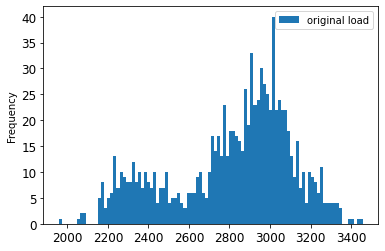

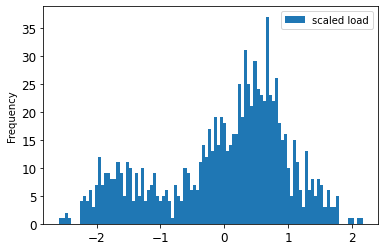

In [21]:
stlf_data[(stlf_data.index >=4801) & (stlf_data.index <=5760)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4801) & (valid.index <=5760)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4801,-1.797025,-1.496916,0.586696,-1.664588,1.439141,-1.226343,-1.795439,-1.879407,-2.011602,0.454879,0.150422,0.211530,-1.894692,-1.790265
4802,-1.790265,-1.300466,0.422770,-1.664588,1.439141,-1.226343,-1.533187,-1.685649,-2.044695,0.338728,0.010099,0.201908,-1.867041,-1.864617
4803,-1.864617,-1.104016,0.258843,-1.664588,1.439141,-1.226343,-1.583620,-1.722397,-2.200235,0.263387,0.072465,0.057588,-1.832190,-2.053876
4804,-2.053876,-0.907566,0.094917,-1.519992,1.439141,-1.226343,-1.704660,-1.799232,-2.193616,0.175489,-0.033557,-0.022590,-1.814044,-2.026839
4805,-2.026839,-0.711116,-0.069010,-1.519992,1.439141,-1.226343,-1.778628,-1.775847,-1.852752,0.078173,-0.283019,-0.125218,-1.823261,-2.084293
4806,-2.084293,-0.514666,-0.232936,-1.519992,1.439141,-1.226343,-1.771904,-1.515276,-1.660809,-0.019143,-0.173879,-0.211811,-1.854080,-2.114710
4807,-2.114710,-0.318216,-0.396863,-1.519992,1.439141,-1.226343,-1.845872,-1.565386,-1.697212,-0.000308,-0.217535,-0.256711,-1.884323,-2.175543
4808,-2.175543,-0.121766,-0.560789,-1.375396,1.439141,-1.226343,-2.034156,-1.685649,-1.773328,-0.144712,-0.201944,-0.340096,-1.913126,-2.178923
4809,-2.178923,0.074684,-0.724716,-1.375396,1.439141,-1.226343,-2.007258,-1.759144,-1.750162,-0.201218,-0.326675,-0.474795,-1.944234,-2.219478
4810,-2.219478,0.271134,-0.888642,-1.375396,1.439141,-1.226343,-2.064416,-1.752462,-1.492032,-0.285977,-0.420224,-0.442724,-2.001264,-2.148506


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4801,-1.797025,-1.496916,0.586696,-1.664588,1.439141,-1.226343,-1.795439,-1.879407,-2.011602,0.454879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.797025
4802,-1.790265,-1.300466,0.422770,-1.664588,1.439141,-1.226343,-1.533187,-1.685649,-2.044695,0.338728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.797025,-1.790265
4803,-1.864617,-1.104016,0.258843,-1.664588,1.439141,-1.226343,-1.583620,-1.722397,-2.200235,0.263387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.797025,-1.790265,-1.864617
4804,-2.053876,-0.907566,0.094917,-1.519992,1.439141,-1.226343,-1.704660,-1.799232,-2.193616,0.175489,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.797025,-1.790265,-1.864617,-2.053876
4805,-2.026839,-0.711116,-0.069010,-1.519992,1.439141,-1.226343,-1.778628,-1.775847,-1.852752,0.078173,...,NaN,NaN,NaN,NaN,NaN,-1.797025,-1.790265,-1.864617,-2.053876,-2.026839
4806,-2.084293,-0.514666,-0.232936,-1.519992,1.439141,-1.226343,-1.771904,-1.515276,-1.660809,-0.019143,...,NaN,NaN,NaN,NaN,-1.797025,-1.790265,-1.864617,-2.053876,-2.026839,-2.084293
4807,-2.114710,-0.318216,-0.396863,-1.519992,1.439141,-1.226343,-1.845872,-1.565386,-1.697212,-0.000308,...,NaN,NaN,NaN,-1.797025,-1.790265,-1.864617,-2.053876,-2.026839,-2.084293,-2.114710
4808,-2.175543,-0.121766,-0.560789,-1.375396,1.439141,-1.226343,-2.034156,-1.685649,-1.773328,-0.144712,...,NaN,NaN,-1.797025,-1.790265,-1.864617,-2.053876,-2.026839,-2.084293,-2.114710,-2.175543
4809,-2.178923,0.074684,-0.724716,-1.375396,1.439141,-1.226343,-2.007258,-1.759144,-1.750162,-0.201218,...,NaN,-1.797025,-1.790265,-1.864617,-2.053876,-2.026839,-2.084293,-2.114710,-2.175543,-2.178923
4810,-2.219478,0.271134,-0.888642,-1.375396,1.439141,-1.226343,-2.064416,-1.752462,-1.492032,-0.285977,...,-1.797025,-1.790265,-1.864617,-2.053876,-2.026839,-2.084293,-2.114710,-2.175543,-2.178923,-2.219478


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4811,-2.148506,0.467583,-1.052568,-1.375396,1.439141,-1.226343,-2.094676,-1.825957,-1.541672,-0.276559,...,-1.790265,-1.864617,-2.053876,-2.026839,-2.084293,-2.114710,-2.175543,-2.178923,-2.219478,-2.148506
4812,-2.236376,0.664033,-1.216495,-1.230800,1.439141,-1.226343,-2.155195,-2.013034,-1.660809,-0.455494,...,-1.864617,-2.053876,-2.026839,-2.084293,-2.114710,-2.175543,-2.178923,-2.219478,-2.148506,-2.236376
4813,-2.469570,0.726070,-1.236166,-1.230800,1.439141,-1.226343,-2.158558,-1.986309,-1.733615,-1.080199,...,-2.053876,-2.026839,-2.084293,-2.114710,-2.175543,-2.178923,-2.219478,-2.148506,-2.236376,-2.469570
4814,-2.594617,0.788107,-1.255837,-1.230800,1.439141,-1.226343,-2.198904,-2.043100,-1.726996,-2.006268,...,-2.026839,-2.084293,-2.114710,-2.175543,-2.178923,-2.219478,-2.148506,-2.236376,-2.469570,-2.594617
4815,-2.520265,0.850144,-1.275508,-1.230800,1.439141,-1.226343,-2.128298,-2.073166,-1.799802,-1.689207,...,-2.084293,-2.114710,-2.175543,-2.178923,-2.219478,-2.148506,-2.236376,-2.469570,-2.594617,-2.520265


In [25]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4811,-2.236376
4812,-2.469570
4813,-2.594617
4814,-2.520265
4815,-2.496608
...,...
5754,0.558576
5755,0.548437
5756,0.399733
5757,0.447048


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
4811,-2.148506,-2.148506,-2.219478,-2.178923,-2.175543,-2.114710,-2.084293,-2.026839,-2.053876,-1.864617,...,-1.375396,1.439141,-1.226343,-2.094676,-1.825957,-1.541672,-0.276559,-0.336030,-0.439517,-2.047925
4812,-2.236376,-2.236376,-2.148506,-2.219478,-2.178923,-2.175543,-2.114710,-2.084293,-2.026839,-2.053876,...,-1.230800,1.439141,-1.226343,-2.155195,-2.013034,-1.660809,-0.455494,-0.401514,-0.535731,-2.091706
4813,-2.469570,-2.469570,-2.236376,-2.148506,-2.219478,-2.178923,-2.175543,-2.114710,-2.084293,-2.026839,...,-1.230800,1.439141,-1.226343,-2.158558,-1.986309,-1.733615,-1.080199,-0.594848,-0.619116,-2.149024
4814,-2.594617,-2.594617,-2.469570,-2.236376,-2.148506,-2.219478,-2.178923,-2.175543,-2.114710,-2.084293,...,-1.230800,1.439141,-1.226343,-2.198904,-2.043100,-1.726996,-2.006268,-0.622912,-0.821165,-2.217575
4815,-2.520265,-2.520265,-2.594617,-2.469570,-2.236376,-2.148506,-2.219478,-2.178923,-2.175543,-2.114710,...,-1.230800,1.439141,-1.226343,-2.128298,-2.073166,-1.799802,-1.689207,-0.697751,-0.827579,-2.273453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5754,0.217234,0.217234,-0.080174,-0.090313,-0.056516,-0.103831,0.223993,0.061771,-0.097072,-0.174803,...,1.516524,-0.807175,0.815433,-0.094163,-0.155628,-0.115338,1.110976,0.212788,1.340438,-0.091041
5755,0.558576,0.558576,0.217234,-0.080174,-0.090313,-0.056516,-0.103831,0.223993,0.061771,-0.097072,...,1.516524,-0.807175,0.815433,-0.047092,-0.078793,-0.284115,1.098419,0.646229,1.353267,-0.016441
5756,0.548437,0.548437,0.558576,0.217234,-0.080174,-0.090313,-0.056516,-0.103831,0.223993,0.061771,...,1.661120,-0.807175,0.815433,-0.080714,0.078218,-0.360230,1.167482,0.611928,1.234603,0.063919
5757,0.399733,0.399733,0.548437,0.558576,0.217234,-0.080174,-0.090313,-0.056516,-0.103831,0.223993,...,1.661120,-0.807175,0.815433,-0.070627,0.238570,-0.370158,1.063887,0.599455,1.520037,0.132471


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(948, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(948,2,1,12)
print(X_valid.shape)

(948, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add((LSTM(128,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 128)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 149,889
Trainable params: 149,889
Non-trainable params: 0
__________________________________________________

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
16/16 [==============================] - 1s 49ms/step - loss: 0.2412 - val_loss: 0.1040
Epoch 2/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0823 - val_loss: 0.0784
Epoch 3/300
16/16 [==============================] - 0s 20ms/step - loss: 0.0646 - val_loss: 0.0533
Epoch 4/300
16/16 [==============================] - 0s 21ms/step - loss: 0.0565 - val_loss: 0.0402
Epoch 5/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0535 - val_loss: 0.0477
Epoch 6/300
16/16 [==============================] - 0s 21ms/step - loss: 0.0524 - val_loss: 0.0561
Epoch 7/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0502 - val_loss: 0.0486
Epoch 8/300
16/16 [==============================] - 0s 21ms/step - loss: 0.0511 - val_loss: 0.0412
Epoch 9/300
16/16 [==============================] - 0s 21ms/step - loss: 0.0495 - val_loss: 0.0555


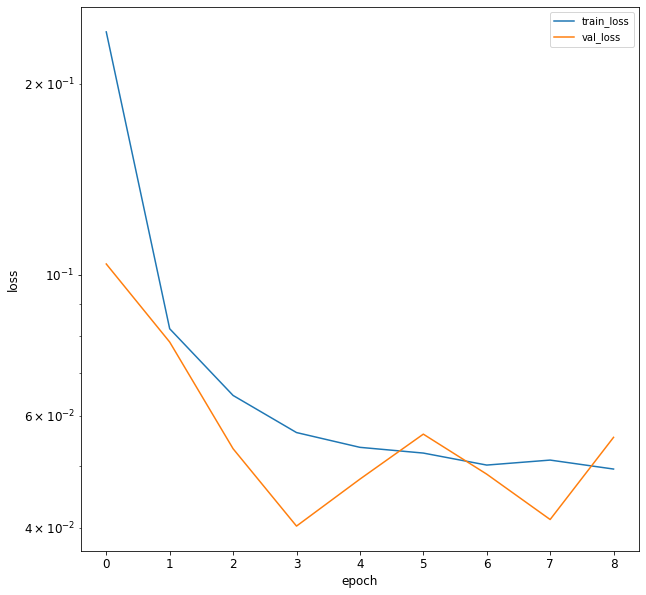

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[stlf_data.index >= 5761][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5761,1949.0,20.102451,59.820965,1.0,2.0,1.0,2050.0,2099.0,1985.0,2097.0,2135.0,2080.0,2044.833333
5762,1926.0,19.362452,62.127955,1.0,2.0,1.0,2006.0,2119.0,2039.0,2104.0,2140.0,2033.0,2035.416667
5763,1925.0,18.622452,64.434944,1.0,2.0,1.0,2011.0,2094.0,2076.0,2097.0,2117.0,2016.0,2022.833333
5764,1915.0,18.622452,64.434944,2.0,2.0,1.0,1957.0,2074.0,2064.0,2039.0,2097.0,2010.0,2010.416667
5765,1906.0,18.622452,64.434944,2.0,2.0,1.0,1949.0,2050.0,2099.0,2045.0,2073.0,2044.0,1994.333333
5766,1923.0,18.757451,63.791247,2.0,2.0,1.0,1926.0,2006.0,2119.0,2015.0,2100.0,2027.0,1978.000000
5767,1900.0,18.892450,63.147550,2.0,2.0,1.0,1925.0,2011.0,2094.0,2045.0,2067.0,2004.0,1961.833333
5768,1903.0,18.892450,63.147550,3.0,2.0,1.0,1915.0,1957.0,2074.0,2048.0,2029.0,1989.0,1947.583333
5769,1903.0,18.892450,63.147550,3.0,2.0,1.0,1906.0,1949.0,2050.0,2013.0,2056.0,1991.0,1935.333333
5770,1866.0,18.132451,62.328874,3.0,2.0,1.0,1923.0,1926.0,2006.0,1998.0,2041.0,2005.0,1923.666667


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 5761 to 8735
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2975 non-null   float64
 1   Temp    2975 non-null   float64
 2   Hum     2975 non-null   float64
 3   A       2975 non-null   float64
 4   B       2975 non-null   float64
 5   C       2975 non-null   float64
 6   D       2975 non-null   float64
 7   E       2975 non-null   float64
 8   F       2975 non-null   float64
 9   G       2975 non-null   float64
 10  H       2975 non-null   float64
 11  I       2975 non-null   float64
 12  J       2975 non-null   float64
dtypes: float64(13)
memory usage: 325.4 KB


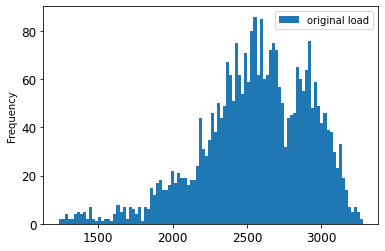

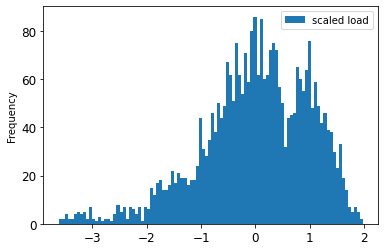

In [36]:
stlf_data[stlf_data.index >= 5761][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5761][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5761,-1.664066,-1.329113,0.401588,-1.662375,-0.981208,0.639754,-1.383310,-1.245943,-1.552896,-1.162114,-1.026393,-1.136235,-1.438832,-1.726954
5762,-1.726954,-1.463229,0.522356,-1.662375,-0.981208,0.639754,-1.503495,-1.191338,-1.405572,-1.143419,-1.013004,-1.264032,-1.465336,-1.729688
5763,-1.729688,-1.597345,0.643124,-1.662375,-0.981208,0.639754,-1.489837,-1.259595,-1.304627,-1.162114,-1.074592,-1.310256,-1.500753,-1.757031
5764,-1.757031,-1.597345,0.643124,-1.517869,-0.981208,0.639754,-1.637337,-1.314200,-1.337366,-1.317016,-1.128146,-1.326570,-1.535701,-1.781639
5765,-1.781639,-1.597345,0.643124,-1.517869,-0.981208,0.639754,-1.659189,-1.379727,-1.241878,-1.300992,-1.192412,-1.234122,-1.580969,-1.735157
5766,-1.735157,-1.572878,0.609427,-1.517869,-0.981208,0.639754,-1.722012,-1.499860,-1.187314,-1.381114,-1.120113,-1.280346,-1.626940,-1.798045
5767,-1.798045,-1.548411,0.575731,-1.517869,-0.981208,0.639754,-1.724744,-1.486208,-1.255519,-1.300992,-1.208478,-1.342885,-1.672443,-1.789842
5768,-1.789842,-1.548411,0.575731,-1.373364,-0.981208,0.639754,-1.752059,-1.633644,-1.310084,-1.292980,-1.310232,-1.383671,-1.712551,-1.789842
5769,-1.789842,-1.548411,0.575731,-1.373364,-0.981208,0.639754,-1.776642,-1.655486,-1.375561,-1.386455,-1.237933,-1.378233,-1.747030,-1.891009
5770,-1.891009,-1.686151,0.532874,-1.373364,-0.981208,0.639754,-1.730207,-1.718283,-1.495603,-1.426516,-1.278099,-1.340166,-1.779867,-1.940226


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5761,-1.664066,-1.329113,0.401588,-1.662375,-0.981208,0.639754,-1.383310,-1.245943,-1.552896,-1.162114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.664066
5762,-1.726954,-1.463229,0.522356,-1.662375,-0.981208,0.639754,-1.503495,-1.191338,-1.405572,-1.143419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.664066,-1.726954
5763,-1.729688,-1.597345,0.643124,-1.662375,-0.981208,0.639754,-1.489837,-1.259595,-1.304627,-1.162114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.664066,-1.726954,-1.729688
5764,-1.757031,-1.597345,0.643124,-1.517869,-0.981208,0.639754,-1.637337,-1.314200,-1.337366,-1.317016,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.664066,-1.726954,-1.729688,-1.757031
5765,-1.781639,-1.597345,0.643124,-1.517869,-0.981208,0.639754,-1.659189,-1.379727,-1.241878,-1.300992,...,NaN,NaN,NaN,NaN,NaN,-1.664066,-1.726954,-1.729688,-1.757031,-1.781639
5766,-1.735157,-1.572878,0.609427,-1.517869,-0.981208,0.639754,-1.722012,-1.499860,-1.187314,-1.381114,...,NaN,NaN,NaN,NaN,-1.664066,-1.726954,-1.729688,-1.757031,-1.781639,-1.735157
5767,-1.798045,-1.548411,0.575731,-1.517869,-0.981208,0.639754,-1.724744,-1.486208,-1.255519,-1.300992,...,NaN,NaN,NaN,-1.664066,-1.726954,-1.729688,-1.757031,-1.781639,-1.735157,-1.798045
5768,-1.789842,-1.548411,0.575731,-1.373364,-0.981208,0.639754,-1.752059,-1.633644,-1.310084,-1.292980,...,NaN,NaN,-1.664066,-1.726954,-1.729688,-1.757031,-1.781639,-1.735157,-1.798045,-1.789842
5769,-1.789842,-1.548411,0.575731,-1.373364,-0.981208,0.639754,-1.776642,-1.655486,-1.375561,-1.386455,...,NaN,-1.664066,-1.726954,-1.729688,-1.757031,-1.781639,-1.735157,-1.798045,-1.789842,-1.789842
5770,-1.891009,-1.686151,0.532874,-1.373364,-0.981208,0.639754,-1.730207,-1.718283,-1.495603,-1.426516,...,-1.664066,-1.726954,-1.729688,-1.757031,-1.781639,-1.735157,-1.798045,-1.789842,-1.789842,-1.891009


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5771,-1.940226,-1.823892,0.490017,-1.373364,-0.981208,0.639754,-1.793031,-1.721013,-1.481962,-1.541358,...,-1.726954,-1.729688,-1.757031,-1.781639,-1.735157,-1.798045,-1.789842,-1.789842,-1.891009,-1.940226
5772,-1.885541,-1.823892,0.490017,-1.228858,-0.981208,0.639754,-1.784836,-1.748316,-1.629286,-1.487943,...,-1.729688,-1.757031,-1.781639,-1.735157,-1.798045,-1.789842,-1.789842,-1.891009,-1.940226,-1.885541
5773,-1.880072,-1.823892,0.490017,-1.228858,-0.981208,0.639754,-1.784836,-1.772888,-1.651112,-1.445211,...,-1.757031,-1.781639,-1.735157,-1.798045,-1.789842,-1.789842,-1.891009,-1.940226,-1.885541,-1.880072
5774,-1.896478,-1.837485,0.541660,-1.228858,-0.981208,0.639754,-1.885901,-1.726473,-1.713861,-1.479931,...,-1.781639,-1.735157,-1.798045,-1.789842,-1.789842,-1.891009,-1.940226,-1.885541,-1.880072,-1.896478
5775,-1.934757,-1.851078,0.593303,-1.228858,-0.981208,0.639754,-1.935067,-1.789270,-1.716589,-1.453224,...,-1.735157,-1.798045,-1.789842,-1.789842,-1.891009,-1.940226,-1.885541,-1.880072,-1.896478,-1.934757


In [40]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5771,-1.885541
5772,-1.880072
5773,-1.896478
5774,-1.934757
5775,-1.978506
...,...
8730,0.955353
8731,0.990898
8732,0.988164
8733,0.750283


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5771,-1.940226,-1.940226,-1.891009,-1.789842,-1.789842,-1.798045,-1.735157,-1.781639,-1.757031,-1.729688,...,-1.373364,-0.981208,0.639754,-1.793031,-1.721013,-1.481962,-1.541358,-1.307554,-1.340166,-1.818098
5772,-1.885541,-1.885541,-1.940226,-1.891009,-1.789842,-1.789842,-1.798045,-1.735157,-1.781639,-1.757031,...,-1.228858,-0.981208,0.639754,-1.784836,-1.748316,-1.629286,-1.487943,-1.302199,-1.386390,-1.838973
5773,-1.880072,-1.880072,-1.885541,-1.940226,-1.891009,-1.789842,-1.789842,-1.798045,-1.735157,-1.781639,...,-1.228858,-0.981208,0.639754,-1.784836,-1.772888,-1.651112,-1.445211,-1.318265,-1.399985,-1.857502
5774,-1.896478,-1.896478,-1.880072,-1.885541,-1.940226,-1.891009,-1.789842,-1.789842,-1.798045,-1.735157,...,-1.228858,-0.981208,0.639754,-1.885901,-1.726473,-1.713861,-1.479931,-1.337009,-1.386390,-1.872045
5775,-1.934757,-1.934757,-1.896478,-1.880072,-1.885541,-1.940226,-1.891009,-1.789842,-1.789842,-1.798045,...,-1.228858,-0.981208,0.639754,-1.935067,-1.789270,-1.716589,-1.453224,-1.369142,-1.380952,-1.889636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8730,0.982695,0.982695,0.985430,0.917073,0.917073,0.873325,0.922542,0.952619,0.941681,0.969024,...,1.516752,0.049545,0.639754,0.875616,0.973778,0.918874,0.993164,1.525484,1.014552,0.980546
8731,0.955353,0.955353,0.982695,0.985430,0.917073,0.917073,0.873325,0.922542,0.952619,0.941681,...,1.516752,0.049545,0.639754,0.919320,0.946475,1.017090,1.065274,1.635271,1.074372,0.975855
8732,0.990898,0.990898,0.955353,0.982695,0.985430,0.917073,0.917073,0.873325,0.922542,0.952619,...,1.661258,0.049545,0.639754,0.919320,0.957396,0.943428,0.971798,1.605816,0.590377,0.980546
8733,0.988164,0.988164,0.990898,0.955353,0.982695,0.985430,0.917073,0.917073,0.873325,0.922542,...,1.661258,0.049545,0.639754,0.987607,0.927363,0.978895,0.897018,1.506740,0.726331,0.981953


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2964, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2964, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2964,2,1,12)

In [45]:
predictions = model.predict(X_test)
predictions

array([[-1.797917  ],
       [-1.7557787 ],
       [-1.7599298 ],
       ...,
       [ 0.9082824 ],
       [ 0.8919917 ],
       [ 0.64245194]], dtype=float32)

In [46]:
feature=stlf_data.copy()[stlf_data.index >= 5761][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    2557.598824
dtype: float64
Cons    365.791485
dtype: float64


In [47]:
load_mean=2557.598824
load_std=365.791485
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+1
5771,1867.884072
5772,1869.884408
5773,1863.883399
5774,1849.881046
5775,1833.878356
...,...
8730,2907.058738
8731,2920.060924
8732,2919.060756
8733,2832.046130


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[1899.9362],
       [1915.3501],
       [1913.8315],
       ...,
       [2889.8408],
       [2883.8818],
       [2792.6023]], dtype=float32)

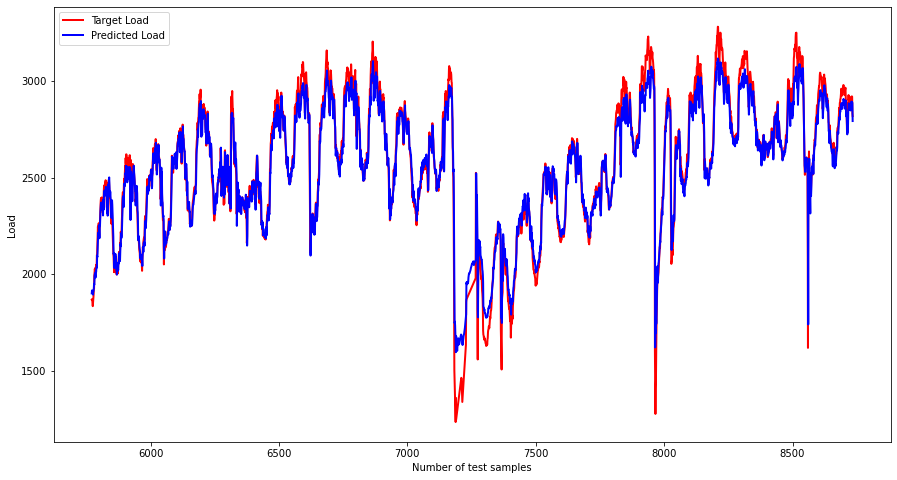

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

2.2169898300312667


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1    0.019713
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5771  186686.691224
5772  186886.009333
5773  186285.660148
5774  184884.719227
5775  183284.127681
...             ...
8730  290606.569174
8731  291907.497764
8732  291807.076577
8733  283102.782686
8734  281705.280465

[2964 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5771  1027.336179
5772  2067.128933
5773  2494.817049
5774  3921.897850
5775  4623.842405
...           ...
8730   408.596405
8731  1684.115361
8732   853.804626
8733  2686.940396
8734   647.268989

[2964 rows x 1 columns]
y_t+1    6031.851347
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    77.664994
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,2964):
    b=a[i]
    print(b)

[1899.9362]
[1915.3501]
[1913.8315]
[1912.5061]
[1901.8772]
[1893.5416]
[1907.6359]
[1912.2966]
[1924.5527]
[1949.2092]
[1944.3323]
[1991.448]
[1998.7488]
[2005.308]
[1994.6399]
[1982.3765]
[2016.6646]
[2010.0311]
[2028.1648]
[2036.0211]
[2033.5662]
[2093.2231]
[2088.6296]
[2134.1072]
[2163.8804]
[2213.2366]
[2184.0571]
[2185.829]
[2253.8103]
[2212.9639]
[2185.7925]
[2242.1882]
[2247.3267]
[2290.1436]
[2325.682]
[2351.4507]
[2369.2383]
[2370.1726]
[2355.5068]
[2357.6724]
[2369.7908]
[2338.9946]
[2331.422]
[2343.6018]
[2303.6064]
[2385.6528]
[2333.5833]
[2387.8542]
[2426.1367]
[2431.3984]
[2416.864]
[2405.4707]
[2407.4744]
[2435.2861]
[2416.4934]
[2451.6182]
[2437.5261]
[2443.9866]
[2416.3188]
[2343.9275]
[2317.6863]
[2385.5164]
[2302.5818]
[2390.0237]
[2425.52]
[2465.3735]
[2449.9893]
[2493.1746]
[2500.4602]
[2449.9368]
[2418.0845]
[2401.963]
[2427.3877]
[2404.9]
[2378.4966]
[2354.3643]
[2326.4395]
[2290.7466]
[2325.059]
[2382.158]
[2359.0898]
[2320.4827]
[2282.684]
[2252.3748]
[2192.9

[2796.325]
[2720.012]
[2705.802]
[2769.3135]
[2829.9832]
[2851.1292]
[2880.2659]
[2923.489]
[2872.099]
[2843.4414]
[2840.903]
[2810.2942]
[2808.7986]
[2821.269]
[2767.6294]
[2748.9026]
[2742.2786]
[2753.708]
[2817.3533]
[2810.6855]
[2792.7603]
[2751.802]
[2697.3684]
[2680.8523]
[2657.9402]
[2622.067]
[2571.348]
[2565.6992]
[2595.0496]
[2549.2822]
[2552.0322]
[2605.7397]
[2539.835]
[2506.5542]
[2521.2878]
[2514.768]
[2500.7046]
[2469.282]
[2464.2195]
[2474.996]
[2465.36]
[2480.5908]
[2480.16]
[2500.2734]
[2525.5315]
[2502.954]
[2534.0215]
[2551.4077]
[2532.9446]
[2554.0498]
[2581.0142]
[2595.4172]
[2593.5454]
[2549.9585]
[2583.8967]
[2577.3906]
[2600.833]
[2639.8794]
[2696.54]
[2777.5596]
[2820.4387]
[2783.1428]
[2788.0195]
[2820.0234]
[2797.5798]
[2788.4768]
[2810.8945]
[2864.1858]
[2883.7002]
[2890.4011]
[2881.635]
[2873.1118]
[2920.998]
[2935.9514]
[2855.6077]
[2820.4639]
[2831.2324]
[2810.1128]
[2832.249]
[2878.6362]
[2845.7913]
[2859.6375]
[2875.0483]
[2881.686]
[2932.4429]
[2938.3

[1659.03]
[1665.637]
[1672.908]
[1681.0377]
[1686.7725]
[1685.7341]
[1679.0864]
[1676.0503]
[1656.3584]
[1642.832]
[1632.7814]
[1647.7671]
[1655.26]
[1666.015]
[1678.4761]
[1684.7715]
[1691.6053]
[1700.8678]
[1706.4084]
[1720.6812]
[1734.9454]
[1749.6099]
[1765.4128]
[1780.3269]
[1791.8866]
[1956.2964]
[1949.5532]
[1946.7]
[1959.6934]
[1949.301]
[1954.6626]
[1953.439]
[1961.8501]
[1983.1907]
[1992.74]
[2003.265]
[2003.9897]
[2003.4965]
[2007.8296]
[2012.461]
[2014.8829]
[2021.351]
[2028.7854]
[2034.8552]
[2037.9641]
[2044.0297]
[2049.5188]
[2053.3806]
[2051.9885]
[2056.3801]
[2061.0732]
[2063.0862]
[2066.0186]
[2058.8232]
[2046.467]
[2049.1353]
[2052.9512]
[2058.5261]
[2062.298]
[2065.7188]
[2068.9824]
[2070.5117]
[2072.5188]
[2521.9224]
[2400.7495]
[2395.0735]
[2408.2615]
[2288.07]
[2173.]
[1817.575]
[1776.2275]
[2061.8235]
[2113.94]
[2176.637]
[2171.206]
[2114.3994]
[2158.8337]
[2170.1155]
[2135.8804]
[2141.9312]
[2093.6099]
[2091.9067]
[2086.083]
[2078.2976]
[2072.8618]
[2073.3083]


[2809.564]
[2820.5244]
[2905.342]
[2893.623]
[2913.1433]
[2900.4133]
[2850.9443]
[2865.672]
[2869.312]
[2845.7866]
[2846.9355]
[2847.373]
[2849.8713]
[2804.8777]
[2653.3042]
[2337.8098]
[2209.7363]
[2124.567]
[2169.2534]
[2163.4028]
[2173.284]
[2174.0496]
[2170.298]
[2256.0977]
[2280.8276]
[2305.306]
[2278.7107]
[2275.0596]
[2284.8965]
[2367.22]
[2479.0283]
[2543.1028]
[2600.8296]
[2637.8323]
[2667.5454]
[2614.6565]
[2620.045]
[2596.3704]
[2636.2065]
[2641.5645]
[2647.3318]
[2672.4707]
[2688.1123]
[2654.884]
[2693.877]
[2741.4224]
[2730.9604]
[2738.9575]
[2710.6536]
[2682.364]
[2668.9985]
[2505.4434]
[2546.245]
[2483.107]
[2506.4785]
[2508.9146]
[2465.9023]
[2473.3237]
[2491.8142]
[2488.2449]
[2490.806]
[2448.9592]
[2428.4583]
[2419.395]
[2426.3198]
[2428.1987]
[2416.986]
[2402.9326]
[2424.5508]
[2468.8035]
[2457.661]
[2466.9873]
[2468.6206]
[2492.7517]
[2487.5923]
[2504.1836]
[2502.155]
[2528.8467]
[2569.4392]
[2577.2656]
[2557.4863]
[2564.4548]
[2587.8657]
[2604.0583]
[2686.7979]
[27

[2812.8125]
[2760.074]
[2723.5261]
[2736.4854]
[2736.8354]
[2774.0706]
[2853.3792]
[2857.2043]
[2884.2656]
[2850.1948]
[2868.864]
[2859.345]
[2851.5532]
[2866.2158]
[2856.4668]
[2847.4253]
[2866.7188]
[2864.4016]
[2893.0454]
[2886.845]
[2879.023]
[2889.8408]
[2883.8818]
[2792.6023]
